In [292]:
from anndata import read_h5ad
import scanpy as sc
import numpy as np
import pandas as pd
from os.path import join

sc.set_figure_params(dpi=100)

In [307]:
adata = read_h5ad(join("data", "raw", "tm", "adata", "Marrow.h5ad"))
adata

AnnData object with n_obs × n_vars = 5355 × 23433
    obs: 'cell_ontology_class', 'cell_ontology_id', 'cluster.ids', 'free_annotation', 'mouse.id', 'mouse.sex', 'plate.barcode', 'subsetA', 'subsetA_cluster.ids', 'subsetB', 'subsetB_cluster.ids', 'subsetC', 'subsetC_cluster.ids', 'subsetD', 'subsetD_cluster.ids', 'subsetE', 'subsetE_cluster.ids', 'subtissue', 'tissue'
    obsm: 'X_tsne'

In [308]:
# Remove spike-in control genes
adata.var['ercc'] = adata.var_names.str.startswith('ERCC-')
adata = adata[:, ~adata.var['ercc']]

/Users/mkeller/anaconda3/envs/lr-env/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [309]:
adata.var['Rn45s'] = adata.var_names == 'Rn45s'
adata = adata[:, ~adata.var['Rn45s']]

Trying to set attribute `.var` of view, copying.


In [310]:
# Remove cells without a cell ontology ID
adata = adata[adata.obs['cell_ontology_id'] != 'nan', :]

In [311]:
sc.pp.filter_cells(adata, min_genes=500)

Trying to set attribute `.obs` of view, copying.


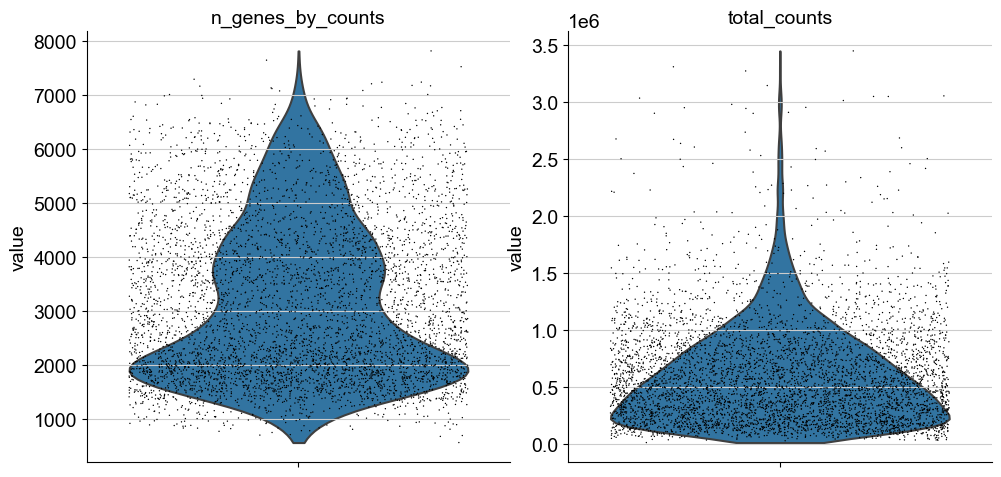

In [312]:
sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts'], jitter=0.4, multi_panel=True)

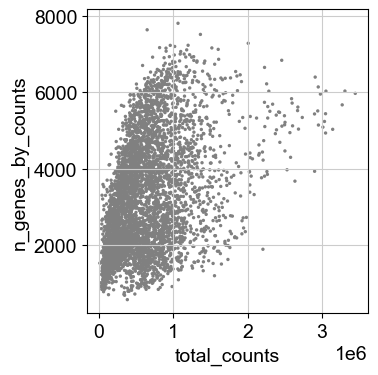

In [313]:
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [314]:
#adata = adata[adata.obs['pct_counts_Rn45s'] < 40.0, :]
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
#adata = adata[:, adata.var.highly_variable]
#sc.pp.regress_out(adata, ['total_counts', 'pct_counts_Rn45s'])

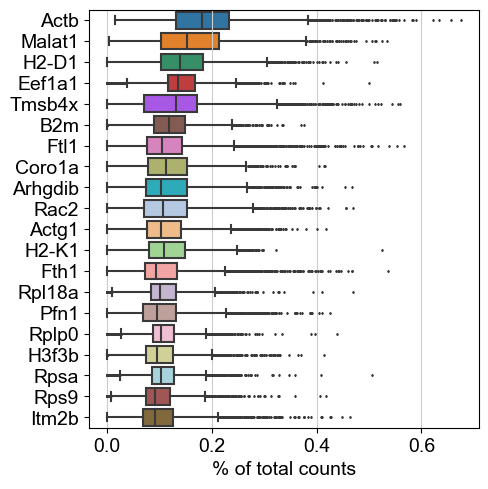

In [315]:
sc.pl.highest_expr_genes(adata, n_top=20, )

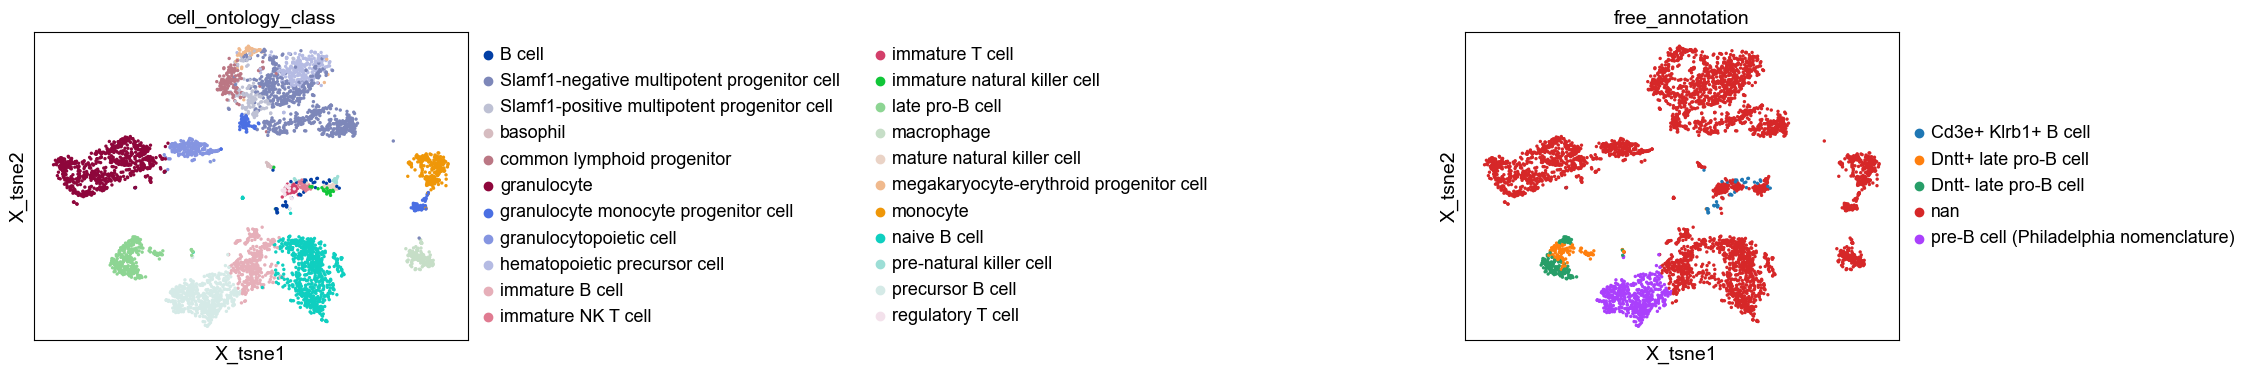

In [316]:
sc.pl.embedding(adata, basis="X_tsne", color=["cell_ontology_class", "free_annotation"], wspace=2)

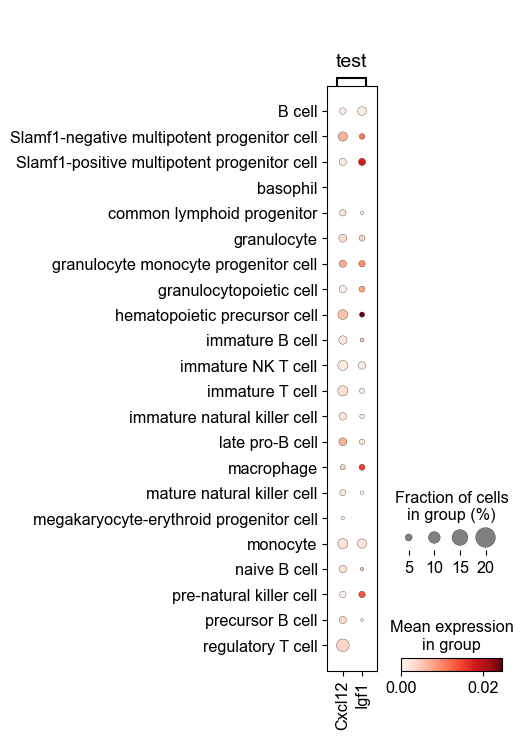

In [317]:
marker_genes_dict = { 'test': ['Cxcl12', 'Igf1'] }
sc.pl.dotplot(adata, marker_genes_dict, 'cell_ontology_class')